In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
df=sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
df2=df[["survived","pclass","age","parch"]]
df2

,survived,pclass,age,parch
0,0,3,22.0,0
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,0
...,...,...,...,...
886,0,2,27.0,0
887,1,1,19.0,0
888,0,3,NaN,2
889,1,1,26.0,0


In [ ]:
df2=df2.fillna(df2.mean())
df2

,survived,pclass,age,parch
0,0,3,22.000000,0
1,1,1,38.000000,0
2,1,3,26.000000,0
3,1,1,35.000000,0
4,0,3,35.000000,0
...,...,...,...,...
886,0,2,27.000000,0
887,1,1,19.000000,0
888,0,3,29.699118,2
889,1,1,26.000000,0


In [ ]:
x=df2.drop(['survived'], axis = 1)
y=df2.drop(['pclass',"age","parch"], axis = 1)

In [ ]:
# m=x.shape[0]
# ones=np.ones((m,1))
# x=np.concatenate((ones,x),axis=1)
# ones

In [ ]:
# class Multivariate_Lr:
#     def __init__(self,n):
#         #initialising weights and bias
#         self.w = np.random.randn(1,n)
#         self.b = 0
#     def pred(self,X):
#         y_pred = np.matmul(X, self.w.T)+self.b #(m,n)x(n,1)=(m,1)
#         return y_pred
#     def Loss(self,y_pred,y):
#         m = y.shape[0]
#         loss = ((y_pred - y)**2)/(2*m)
#         return np.sum(loss)
#     def grad(self,X,y):
#         m = y.shape[0]
#         y_hat = self.pred(X)
#         dw = np.matmul((y_hat - y).T , X)*(1/m) #(1,n)
#         db = np.sum(y_hat - y)*(1/m) #scalar value
#         return dw, db
#     def fit(self,X,y,epochs,lr):
#         self.w_hist = self.w
#         self.b_hist = [self.b]
#         Loss = []
#         #Storing the initial loss before starting the training
#         y_pred = self.pred(X)
#         initial_loss = self.Loss(y_pred,y)
#         Loss.append(initial_loss)
#         for i in range(1,epochs+1):
#             dw,db = self.grad(X,y)
#             self.w = self.w - lr*dw
#             self.b = self.b - lr*db
#             y_pred = self.pred(X)
#             loss = self.Loss(y_pred, y)
#             Loss.append(loss)
#             #Storing the updated values of w,b
#             self.w_hist = np.append(self.w_hist, self.w, axis = 0)
#             self.b_hist.append(self.b)
#             #print('Epoch: ',i,'Training Loss: ',loss)
#         print('Final Loss: ',loss)
#         plt.plot(Loss,'-o')
#         plt.xlabel('Epoch')
#         plt.ylabel('Loss')
#         plt.show()

In [ ]:
y

,survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  app.launch_new_instance()


Final Loss:  0           0.0
survived    0.0
dtype: float64


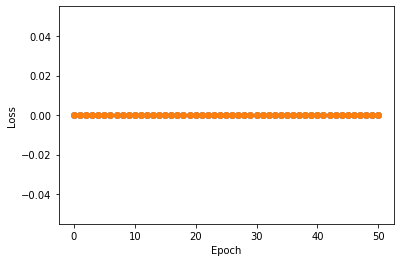

In [ ]:
class Multivariate_Lr:
    def __init__(self,n):
        #initialising weights and bias
        self.w = np.random.randn(1,n)
        self.b = 0
    def pred(self,x):
        y_pred = np.matmul(x, self.w.T)+self.b #(m,n)x(n,1)=(m,1)
        return y_pred
    def Loss(self,y_pred,y):
        m = y.shape[0]
        loss = ((y_pred - y)**2)/(2*m)
        return np.sum(loss)
    def grad(self,X,y):
        m = y.shape[0]
        y_hat = self.pred(X)
        dw = np.matmul((y_hat - y).T , X)*(1/m) #(1,n)
        db = np.sum(y_hat - y)*(1/m) #scalar value
        return db
    def fit(self,X,y,epochs,lr):
        self.w_hist = self.w
        self.b_hist = [self.b]
        Loss = []
        y_pred = self.pred(X)
        initial_loss = self.Loss(y_pred,y)
        Loss.append(initial_loss)
        for i in range(1,epochs+1):
          dw,db = self.grad(X,y)
          self.w = self.w - lr*dw
          self.b = self.b - lr*db
          y_pred = self.pred(X)
          loss = self.Loss(y_pred, y)
          Loss.append(loss)
          self.w_hist = np.append(self.w_hist, self.w, axis = 0)
          self.b_hist.append(self.b)
        print('Final Loss: ',loss)
        plt.plot(Loss,'-o')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.show()
obj=Multivariate_Lr(x.shape[1])
# # obj.w
# Y_pred=obj.pred(x)
# Y_pred
# # # obj.Loss(Y_pred,y)
# # obj.Loss(Y_pred,y)
# # obj.grad(x,y)
obj.fit(x,y,50,0.01)

In [ ]:
# m = y.shape[0]
# y_hat=Y_pred
# l=np.matmul((y_hat - y).T , x)
# l

In [ ]:
x

,pclass,age,parch
0,3,22.000000,0
1,1,38.000000,0
2,3,26.000000,0
3,1,35.000000,0
4,3,35.000000,0
...,...,...,...
886,2,27.000000,0
887,1,19.000000,0
888,3,29.699118,2
889,1,26.000000,0


In [ ]:
x1 = np.array([[2,4,5]])
x2=np.array([[6,7,9]])
k=np.matmul(x1.T,x2)
k

array([[12, 14, 18],
       [24, 28, 36],
       [30, 35, 45]])

In [ ]:
a=[1,2,3]
b=[1]
k=a+b
k

[1, 2, 3, 1]

In [ ]:
w = np.random.randn(1,3)
k=w
w=np.append(k,w,axis=0)
w

array([[ 0.16600746, -0.89706809,  2.2594319 ],
       [ 0.16600746, -0.89706809,  2.2594319 ]])

In [ ]:
# https://colab.research.google.com/drive/1CZamDQaeOjykLsOOs0Mrd72diM7_fJvo?authuser=1

#real state data set

In [ ]:
data=pd.read_csv("Real estate.csv")

In [ ]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
data.shape

(414, 8)

In [ ]:
X=data.iloc[:,2:-1]
X.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245


In [ ]:
y = data.iloc[:,[-1]]
y.head()

,Y house price of unit area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1


#feature scaling

In [ ]:
X

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381
410,5.6,90.45606,9,24.97433,121.54310
411,18.8,390.96960,7,24.97923,121.53986
412,8.1,104.81010,5,24.96674,121.54067


In [ ]:
sc = StandardScaler()
sc.fit(X)
X_scaled = sc.transform(X)

In [ ]:
X_scaled.shape

(414, 5)

In [1]:
X_scaled

NameError: ignored

In [ ]:
y = y.to_numpy()
y.shape

(414, 1)

In [ ]:
class Multivariate_Lr:
    def __init__(self,n):
        #initialising weights and bias
        self.w = np.random.randn(1,n)
        self.b = 0
    def pred(self,X):
        y_pred = np.matmul(X, self.w.T)+self.b #(m,n)x(n,1)=(m,1)
        return y_pred
    def model_accuracy(self,y_pred,y):
        error=np.sum((y_pred-y)**2)
        accuracy=np.sqrt(error / y.shape[0])
        return accuracy
    def Loss(self,y_pred,y):
        m = y.shape[0]
        loss = ((y_pred - y)**2)/(2*m)
        return np.sum(loss)
    def grad(self,X,y):
        m = y.shape[0]
        y_hat = self.pred(X)
        dw = np.matmul((y_hat - y).T , X)*(1/m) #(1,n)
        db = np.sum(y_hat - y)*(1/m) #scalar value
        return dw, db
    def fit(self,X,y,epochs,lr):
        self.w_hist = self.w
        self.b_hist = [self.b]
        Loss = []
        #Storing the initial loss before starting the training
        y_pred = self.pred(X)
        initial_loss = self.Loss(y_pred,y)
        Loss.append(initial_loss,)
        for i in range(1,epochs+1):
            dw,db = self.grad(X,y)
            self.w = self.w - lr*dw
            self.b = self.b - lr*db
            y_pred = self.pred(X)
            loss = self.Loss(y_pred, y)
            Loss.append(loss)
            #Storing the updated values of w,b
            self.w_hist = np.append(self.w_hist, self.w, axis = 0)
            self.b_hist.append(self.b)
            #print('Epoch: ',i,'Training Loss: ',loss)
        print('Final Loss: ',loss)
        plt.plot(Loss,'-o')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.show()

In [ ]:
model = Multivariate_Lr(X_scaled.shape[1])

Final Loss:  39.60215665309826


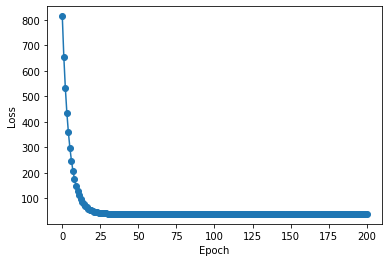

In [ ]:
model.fit(X_scaled,y,200, lr = 0.1)

In [ ]:
y_pred=model.pred(X_scaled)

In [ ]:
model.model_accuracy(y_pred,y)

8.899680517085796

In [ ]:
def prediction(model):
    l=[]
    l.append(float(input('Enter House Age: ')))
    l.append(float(input('distance to the nearest MRT station: ')))
    l.append(float(input('number of convenience stores: ')))
    l.append(float(input('Latitude: ')))
    l.append(float(input('Longitude: ')))
    arr = np.asarray([l])
    scaled_arr = sc.transform(arr)
    print('Price of the house per unit area: ', model.pred(scaled_arr)[0][0])

In [ ]:
prediction(model)

Enter House Age: 19.5
distance to the nearest MRT station: 306.59470
number of convenience stores: 9
Latitude: 24.98034
Longitude: 121.53951
Price of the house per unit area:  49.17934839476788


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
